# Linear Regression Example

In this notebook we demonstrate  the mechanics of learning in a toy example.

We will discuss **overfitting** next lecture.

## Preliminaries

### Imports

In [1]:
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import scipy.optimize
import sklearn.datasets
import sklearn.linear_model


%matplotlib inline



### Data Directories 

Create a directory with the path below

In [5]:
raw_data_dir="../../raw/probabilisticTools"
data_dir="../../data/probabilisticTools"


### Random Seed

In [6]:
seed=2506
np.random.seed(seed)

### Get Data


we read the contents of "regression_data.csv" into a `pandas.DataFrame` object

In [7]:
data=pd.read_csv(raw_data_dir+"/regression_data.csv")
data.describe()

X            Y
count  1000.000000  1000.000000
mean      0.021253     0.126782
std       0.581702     0.280140
min      -0.997453    -0.319775
25%      -0.472366    -0.020732
50%       0.007915     0.011379
75%       0.534149     0.108054
max       0.999876     1.243707


Let's visualize the data

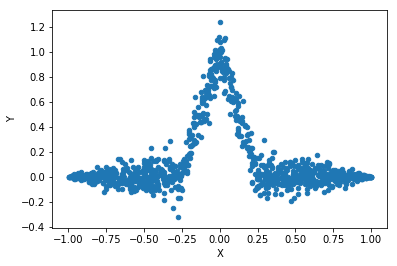

In [8]:
data.plot("X","Y",kind="scatter")


We generate `numpy` arrays named `X` and `Y` for the data of those columns

In [9]:
X=data["X"].as_matrix()
Y=data["Y"].as_matrix()
X.shape,Y.shape

((1000,), (1000,))

From now on, we will work only with the arrays `X` and `Y`

### Data Regression Model

In this notebook assume the following model
$$
     y = \sum_{d=0}^{D} h_d(x) \theta_d  + \epsilon
$$
where **$D=10$**, $\epsilon$ is a Gaussian noise term, and the *feature functions* $h_d$ are defined as follows

$$
    h_d(x) = \cos(d \pi x)
$$

[HINT] Note that $d$ runs from **0** to $D$, so there are $D+1$ features in total

You will  work out in  the homework the **maximum likelihood loss function** for this problem.
It is:

$$
    E = \frac{1}{2N}\sum_i \left( y_i -\hat{y_i} \right)^2
$$
where the predicted $Y$ is 

$$
    \hat{y}_i = \sum_d h_d(x_i)\theta_d= \sum_d H_{i,d}\theta_d
$$

The solution for $\theta$ must satisfy
$$
 (H^T H)  \theta = H^T Y
$$

**[Note]** In the max likelihood derivation there is a common variance $\sigma^2$ factor.  As a scale it does not effect the estimate value of $\theta$, so we will ignore it.

## Feature generation


We use the function [`numpy.arange`](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.arange.html) 
generate and `np.array` of indexes $d=$0,1,...,D$


In [10]:
D=10
d=np.arange(0,D+1)
d

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10])


We generate the **phase** matrix
$$ 
    \phi_{i,d} = d \pi x_i
$$

In [21]:
phi=np.pi*X[:,np.newaxis]*d[np.newaxis,:]
print(phi)
phi.shape

[[ -0.          -0.77820922  -1.55641845 ...,  -6.22567378  -7.00388301
   -7.78209223]
 [ -0.          -2.15626965  -4.31253931 ..., -17.25015722 -19.40642687
  -21.56269653]
 [ -0.          -0.95401154  -1.90802309 ...,  -7.63209235  -8.58610389
   -9.54011544]
 ..., 
 [  0.           1.61753308   3.23506617 ...,  12.94026467  14.55779776
   16.17533084]
 [ -0.          -3.13359115  -6.26718229 ..., -25.06872917 -28.20232032
  -31.33591147]
 [ -0.          -2.75131945  -5.5026389  ..., -22.01055558 -24.76187503
  -27.51319448]]


(1000, 11)

And, finally, we generate the feature matrix for the data
$$ 
    H_{i,d} = h_d(x_i) = \cos ( \phi_{i,d})
$$

In [12]:
H=np.cos(phi)
H.shape

(1000, 11)

## Exact Solution with Numpy

2. Expressed in terms of $H$ this is just a multivariate regression problem.
1. `numpy.linalg` has a specialized function `numpy.linalg.lstsq` to solve lsq problems.
2. `numpy.linalg.solve(H,Y)` would work in most cases but it can have problems with numerical stability.
3. Computing matrix inverses is computationally expensive, and numerical ill conditioned. Avoid computing them.

In [22]:
res=np.linalg.lstsq( H,Y)
print(res)
theta_exact=res[0]
theta_exact

(array([ 0.12635115,  0.24109746,  0.20214756,  0.15312855,  0.10375624,
        0.05691156,  0.02238714,  0.00156388, -0.00165544,  0.00233476,
        0.01071346]), array([ 5.74769023]), 11, array([ 31.8038981 ,  24.36480116,  24.07199778,  23.6882082 ,
        22.8058489 ,  22.28809364,  21.87851883,  21.81963552,
        21.76589931,  21.18620423,  20.59407365]))


array([ 0.12635115,  0.24109746,  0.20214756,  0.15312855,  0.10375624,
        0.05691156,  0.02238714,  0.00156388, -0.00165544,  0.00233476,
        0.01071346])

Coefficients look **very large**!


Let's look at the predicted values `Y_pred`.

In [26]:
Y_pred=np.dot(H,theta_exact)


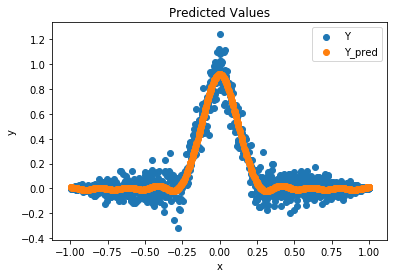

In [15]:
plt.scatter(X,Y,label="Y")
plt.scatter(X,Y_pred,label="Y_pred")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Predicted Values")
plt.legend()

The predicted function looks fairly reasonable.

Let's compute the residuals

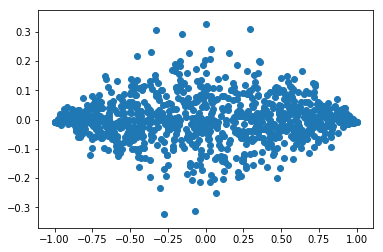

In [16]:
dY=Y-Y_pred
plt.scatter(X,dY,label="Y")


The mean square error

In [17]:
np.mean(dY**2)

0.005747690228117751

<div class="alert alert-block alert-success">Alternative Solution </div>
We could solve this is a numerically more naive fashion

$$
      (H^T H)  \theta = H^T Y
$$

so we just need to solve for $H^T Y$ given matrix $N=(H^T H)$

In [27]:
theta_exact2=np.linalg.solve(np.dot(H.T,H),np.dot(H.T,Y))
print(theta_exact2)
Y_sol=np.dot(H,theta_exact2)

[ 0.12635115  0.24109746  0.20214756  0.15312855  0.10375624  0.05691156
  0.02238714  0.00156388 -0.00165544  0.00233476  0.01071346]


The MSE is identical

In [28]:
dY=Y-Y_sol
np.mean(dY**2)

0.005747690228117751

An so are the coefficients $\theta$

In [29]:
for idx in range(len(theta_exact)):
    print(idx,theta_exact[idx],theta_exact2[idx])

(0, 0.12635114958515606, 0.12635114958515639)
(1, 0.24109745620219422, 0.24109745620219319)
(2, 0.20214755624055353, 0.20214755624055356)
(3, 0.15312854924332142, 0.15312854924332175)
(4, 0.1037562441486648, 0.10375624414866474)
(5, 0.056911562775099379, 0.056911562775099539)
(6, 0.022387142757264396, 0.022387142757264316)
(7, 0.0015638798660135957, 0.0015638798660135328)
(8, -0.001655435122445797, -0.0016554351224458287)
(9, 0.0023347555514943103, 0.0023347555514943428)
(10, 0.010713456171463454, 0.01071345617146359)


## Gradient Descent Optimization

We will now solve the same problem using Gradient Descent, instead of the analytic solution.


We define a python function `mse(theta,H,Y)` that computes the mean square error function given $\theta$, $H$ and $Y$

$$ 
    E = \frac{1}{2}\sum_i \left (\sum_d H_{i,d}\theta_d - Y_i\right)^2
$$

In [30]:
def mse(theta,H,Y):
    Y_pred=np.dot(H,theta)
    dY=Y_pred-Y
    return 0.5*np.mean(dY**2)


We define a python function `grad(theta,H,Y)` that computes the gradient of the error function given $\theta$, $H$ and $Y$

$$
    \frac{\partial E}{\partial \theta_d} = 
             \frac{1}{N}\sum_i H_{i,d} \left(\sum_{d'} H_{i,d'}\theta_{d'} - Y_i\right) 
$$

In [31]:
def grad(theta,H,Y):
    Y_pred=np.dot(H,theta)
    dY=(Y_pred-Y)
    return np.dot(H.T,dY)/len(H)


We use [`numpy.random.normal`](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.random.normal.html) 
generate a random guess of the vector $\theta_0$.


In [35]:
theta0=np.random.normal(size=D+1)
theta0

array([-0.33398825, -0.25641437, -1.80373387, -0.61103741,  0.88716669,
       -1.22492567,  1.29036827,  0.72209342, -1.58194044,  1.51710743,
        0.12579521])

Before optimize we must **always** 
use the function [`scipy.optimze.check_grad`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.check_grad.html)
to verify numerically that `grad` is implemented correctly and it  really is the gradient of `mse` for the  $\theta_0$ guess.



In [21]:
scipy.optimize.check_grad(mse,grad,theta0,H,Y)

7.6894344883646374e-08

No we implement the 
** Steepest Descent Algorithm**

1. Set  $\eta=0.1$
1. Implement the steepest descent update rule
    $$
        \theta \leftarrow \theta - \eta \frac{\partial E}{\partial \theta}
    $$
1. Run the update rule on a loop, starting from your random guess for $\theta$. Repeat  $T=1,000$ times
1. Every 100 steps, print the step number and the current error
1. After 1,000 steps, print the final error, and the final $\theta$ parameters.

In [22]:
eta=0.1
T=1000
theta=theta0
for t in range(T):
    if (t % 100 ==0):
        print(t,mse(theta,H,Y))
    theta = theta - eta * grad(theta,H,Y)
print(T,mse(theta,H,Y))
print("theta",theta)

0 3.53194152833
100 0.00299394551826
200 0.00287385078201
300 0.00287384511435
400 0.00287384511406
500 0.00287384511406
600 0.00287384511406
700 0.00287384511406
800 0.00287384511406
900 0.00287384511406
1000 0.00287384511406
theta [ 0.12635115  0.24109746  0.20214756  0.15312855  0.10375624  0.05691156
  0.02238714  0.00156388 -0.00165544  0.00233476  0.01071346]


We compare the MSE of the steepest descent solution to the exact solution.

In [23]:
E=mse(theta,H,Y)
E_exact=mse(theta_exact,H,Y)
print("approx",E)
print("exact",E_exact)
print("diff",E-E_exact)

approx 0.00287384511406
exact 0.00287384511406
diff 0.0


We have found the same solution


In [24]:
Y_sd=np.dot(H,theta)

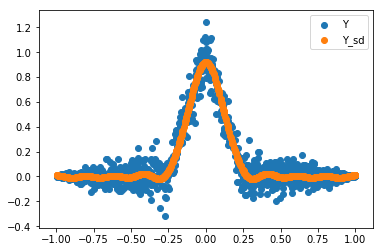

In [25]:
plt.scatter(X,Y,label="Y")
plt.scatter(X,Y_sd,label="Y_sd")
plt.legend()

## Sklearn Comparison


We can use [`sklearn.linear_model.LinearRegression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)
to fit our model.


In [36]:
model=sklearn.linear_model.LinearRegression(fit_intercept=False)
model.fit(H,Y)

/Users/wrk/.pyenv/versions/2.7.13/lib/python2.7/site-packages/scipy/linalg/basic.py:1018: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


LinearRegression(copy_X=True, fit_intercept=False, n_jobs=1, normalize=False)

Results are identical to the `numpy` solution

In [37]:
Y_sk = model.predict(H)
dY=(Y_sk-Y_pred)
np.dot(dY.T,dY)/len(dY)

1.1909750610612417e-31

The solution is stored on the model's  `coef_` variable

Results are again identical

In [28]:
print("feature, theta,theta_exact")
for idx in range(H.shape[1]):
    print(idx,model.coef_[idx],theta_exact[idx])

feature, theta,theta_exact
0 0.126351149585 0.126351149585
1 0.241097456202 0.241097456202
2 0.202147556241 0.202147556241
3 0.153128549243 0.153128549243
4 0.103756244149 0.103756244149
5 0.0569115627751 0.0569115627751
6 0.0223871427573 0.0223871427573
7 0.00156387986601 0.00156387986601
8 -0.00165543512245 -0.00165543512245
9 0.00233475555149 0.00233475555149
10 0.0107134561715 0.0107134561715


### Statmodels  Comparison

In [29]:
import statsmodels.api as sm

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


We can also solve using  `statmodels` so that we appreciate the difference in emphasis between Machine Learning (`sklearn`) and Statistics Modeling `statmodels` 

In [30]:
model=sm.OLS(Y,H)
results=model.fit()

In [31]:
print("feature, theta,theta_exact")
for idx in range(H.shape[1]):
    print(idx,results.params[idx],theta_exact[idx])

feature, theta,theta_exact
0 0.126351149585 0.126351149585
1 0.241097456202 0.241097456202
2 0.202147556241 0.202147556241
3 0.153128549243 0.153128549243
4 0.103756244149 0.103756244149
5 0.0569115627751 0.0569115627751
6 0.0223871427573 0.0223871427573
7 0.00156387986601 0.00156387986601
8 -0.00165543512245 -0.00165543512245
9 0.00233475555149 0.00233475555149
10 0.0107134561715 0.0107134561715



 `statmodels` provides a goodness of fit summary (function `summary` of the results object).


In [34]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.927
Model:                            OLS   Adj. R-squared:                  0.926
Method:                 Least Squares   F-statistic:                     1250.
Date:                Fri, 26 Jan 2018   Prob (F-statistic):               0.00
Time:                        07:39:26   Log-Likelihood:                 1160.5
No. Observations:                1000   AIC:                            -2299.
Df Residuals:                     989   BIC:                            -2245.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1264      0.002     52.117      0.0

1. The process we specified  $y = f(x)+\epsilon$ is not exactly correct.
1. `statmodels` finds a good fit.
2. Our approximation to $f(x)$ seems reasonable, but we may be overfitting a for $d\le 7$.
3. We will analyze the situation in more detail next week.